# Simple Linear Regression by Ordinary Least Square Method

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math


### Loading Data

In [2]:
data = pd.read_csv('../input/predictingese/AttendanceMarksSA.csv')

In [3]:
data.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [4]:
data.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


### Correlation Analysis

Correlation analysis is necessary to check the linearity between the input variables and output variable.

In [5]:
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Attendance,MSE,ESE
Attendance,1.000000,-0.080943,-0.109972
MSE,-0.080943,1.000000,0.751530
ESE,-0.109972,0.751530,1.000000


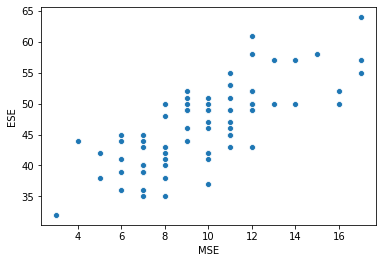

In [6]:
X = data["MSE"]
y = data["ESE"]

sns.scatterplot(X,y)

### Preprocessing

* input vector - exog
* output vector - endog

by using **sm.add_constant** we can add constant unit vector in input features.

In [7]:
endog = data['ESE']

exog = sm.add_constant(data[['MSE']])

print(exog.head())

   const  MSE
0    1.0   10
1    1.0    7
2    1.0    3
3    1.0   16
4    1.0    9


In [8]:
print(endog.head())

0    42
1    39
2    32
3    50
4    44
Name: ESE, dtype: int64


### Model Preparation

In [9]:
model = sm.OLS(endog , exog)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           1.85e-14
Time:                        18:09:33   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

### Calculating Residual Standard Error 

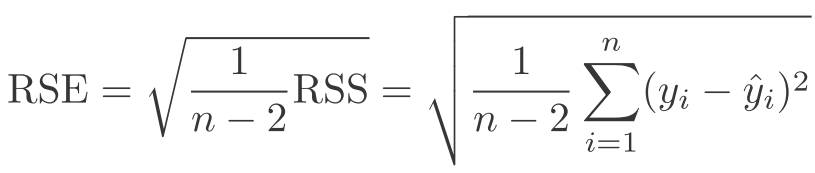

In [10]:
def RSE(y_true , y_predicted):
    
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    
    RSS = np.sum(np.square(y_true-y_predicted))
    
    rse = math.sqrt( RSS / (len(y_true) - 2))
    
    return rse

In [11]:
rse = RSE(data['ESE'],results.predict())
print(rse)

4.396224549647786


### Predicting Marks

In [12]:
marks = 17
end_marks = results.predict([1,marks])
print(end_marks)

[58.41293033]


## 2. Model using Attendance as input feature

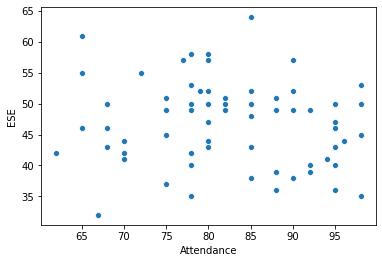

In [13]:
X1 = data["Attendance"]
y1 = data["ESE"]

sns.scatterplot(X1 ,y1)


### Preprocessing

In [14]:
endog1 = data['ESE']
exog1 = sm.add_constant(data[['Attendance']])
print(exog1.head(),end="\n\n")
print(endog1.head())

   const  Attendance
0    1.0          70
1    1.0          92
2    1.0          67
3    1.0          82
4    1.0          80

0    42
1    39
2    32
3    50
4    44
Name: ESE, dtype: int64


### Model Preparation

In [15]:
model1 = sm.OLS(endog1, exog1)
results1 = model1.fit()

### Calculating Residual Standard Error

In [16]:
rse = RSE(data['Attendance'],results1.predict())
print(rse)

37.02247481113971


In [17]:
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Tue, 06 Oct 2020   Prob (F-statistic):              0.354
Time:                        18:09:33   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0

## Final Conclusion

1. * R - square value for model is 0.565 which is acceptable.
   * R - sqaure value for model1 is 0.012 which is very low , indicates weak or non-existene of linearity in Attendance and ESE.
  
  
2. * The values of t-statistics for y-intercept and slope are very high in model.
   * The values of t-statistics for slope is less than 1 in model1.
   
  
3. * The value of calculated RSE is 4.3 in model, which is acceptable.
   * The value of calculated RSE is 37 in model1, which is very high.

So Model with ***MSE*** as input feature is **better**.

Model with ***Attendance*** as input feature is **not acceptable**.